In [1]:
import openai
import wandb
from pathlib import Path
import pandas as pd
import numpy as np
import json
from tqdm import tqdm

In [2]:
!openai wandb sync

🎉 wandb sync completed successfully


wandb: Currently logged in as: ghosh-11. Use `wandb login --relogin` to force relogin
wandb: - Waiting for wandb.init()...
wandb: \ Waiting for wandb.init()...
The file will have its original line endings in your working directory
wandb: Tracking run with wandb version 0.15.2
wandb: Run data is saved locally in g:\MTechClasses\DL-Ops\Project\hate-speech-detection\notebooks\wandb\run-20230507_165606-ft-UPkeclFHu5hdKsxdJfvXRSqL
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ft-UPkeclFHu5hdKsxdJfvXRSqL
wandb:  View project at https://wandb.ai/ghosh-11/GPT-3
wandb:  View run at https://wandb.ai/ghosh-11/GPT-3/runs/ft-UPkeclFHu5hdKsxdJfvXRSqL
wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:      classification/accuracy █▁▁▅
wandb:         classification/auprc █▁▁▂
wandb:         classification/auroc █▃▁▂
wandb:          classification/f1.0 █▄▁▄
wandb:     classification/precision █▁▂▅
wandb:        classification/recall ▁█▁▁
wandb

In [5]:
import pandas as pd
import os

file_types = ['trn', 'dev', 'tst']
for f in file_types:
    src_data_df = pd.read_csv(f'../data/SBIC.v2.agg.{f}.csv').sample(frac=0.05)
    result_df = pd.DataFrame()

    result_df['prompt'] = src_data_df['post'].apply(lambda x: str(x)+'\n\n###\n\n')
    result_df['completion'] = src_data_df['offensiveYN'].apply(lambda x: ' 1' if x > 0.5 else ' 0')

    result_df.to_json(f'../data/SBIC.v2.agg.{f}.tiny.promted_prepared.jsonl',orient='records',lines=True)
    print(f'openai tools fine_tunes.prepare_data -f data/SBIC.v2.agg.{f}.tiny.promted_prepared.jsonl')

openai tools fine_tunes.prepare_data -f data/SBIC.v2.agg.trn.tiny.promted_prepared.jsonl
openai tools fine_tunes.prepare_data -f data/SBIC.v2.agg.dev.tiny.promted_prepared.jsonl
openai tools fine_tunes.prepare_data -f data/SBIC.v2.agg.tst.tiny.promted_prepared.jsonl


In [4]:
!openai tools fine_tunes.prepare_data -f ../data/SBIC.v2.agg.trn.promted.csv

^C


In [ ]:
!openai api fine_tunes.create -t "data/SBIC.v2.agg.trn.tiny.promted_prepared.jsonl" -v "data/SBIC.v2.agg.dev.tiny.promted_prepared.jsonl"  --compute_classification_metrics --classification_positive_class " 1" -m davinci --n_epochs 1 --learning_rate_multiplier 0.05

In [7]:
!curl https://api.openai.com/v1/fine-tunes/ft-u3oC6MarWll2btewysd1wTI8  -H "Authorization: Bearer $OPENAI_API_KEY"> ../results/fine-tuned-davinchi.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   245  100   245    0     0    342      0 --:--:-- --:--:-- --:--:--   342
100   245  100   245    0     0    342      0 --:--:-- --:--:-- --:--:--   342


In [6]:
!openai api fine_tunes.results -i ft-UPkeclFHu5hdKsxdJfvXRSqL > result.csv

Error: No results file available for fine-tune ft-HGqkTToaXFMc4RUPlhTyYlbH


In [9]:
results = pd.read_csv('../results/results_davinchi.csv')
results[results['classification/accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
3542,3543,312190,7086,0.021387,1.0,1.0,NaN,NaN,NaN,0.811159,0.809917,0.823529,0.859539,0.856152,0.816667


<AxesSubplot:>

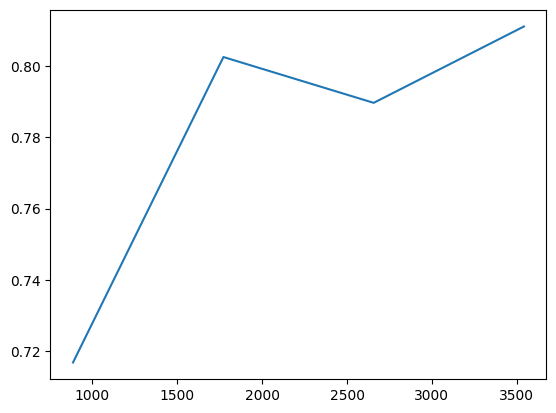

In [10]:
results[results['classification/accuracy'].notnull()]['classification/accuracy'].plot()

<AxesSubplot:>

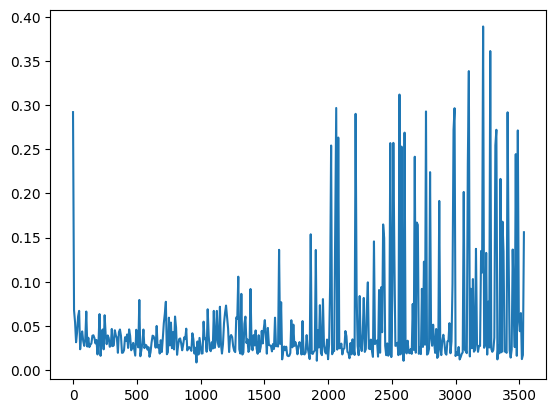

In [11]:
results[results['validation_loss'].notnull()]['validation_loss'].plot()

Using the model

In [12]:
test = pd.read_json('../data/SBIC.v2.agg.tst.tiny.promted_prepared.jsonl',orient='records',lines=True)
test.head()

,prompt,completion
0,1 horrible cunt that Ross Barkley. 2 bad tackl...,1
1,Parents:\n\nIf YOU do not teach your children ...,1
2,"The kikes probably put the Leftist up to it , ...",1
3,"""Just when you think the Swans are dead and bu...",0
4,It is people like James O'Keefe and Project Ve...,0


In [13]:
import openai

ft_model = 'davinci:ft-personal-2023-05-07-12-34-28'
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][2], max_tokens=1, temperature=0)
res['choices'][0]['text']

' 1'

In [14]:
print(test['prompt'][2])
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][2], max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['logprobs']['top_logprobs'][0]

The kikes probably put the Leftist up to it , to make it seem like they do n't have total control of everyone .

###




<OpenAIObject at 0x1fa90c3d940> JSON: {
  " 0": -11.771873,
  " 1": -3.988961e-05
}